# 1.数据生成

In [1]:
import numpy as np

## 1.1生成变量$x$

In [2]:
totnub = 170 #数据的数量
train_nub = int(totnub * 0.6) #前n个作为训练数据
a=-4#图像显示范围
b=6
np.random.seed(0)
X = np.random.normal(size=(totnub,1),scale=1,loc=0.4) - 1 #产生在-1附近按正态分布的20组数据
X.shape

(170, 1)

## 实际函数为    

$ y = -x^3 + 3x^2 + 2x + 1 $

In [3]:
p = 2 * np.random.random(totnub)#产生噪声
p.shape

(170,)

In [4]:
Y = -X[:,0]**3 + 3 * X[:,0]**2 + 2 * X[:,0] + 1 + p
Y = Y.reshape(totnub,1)
Y.shape

(170, 1)

In [5]:
All_data = np.concatenate((X,Y),axis=1)
All_data.shape

(170, 2)

## 1.2 训练数据vs. 测试数据

In [6]:
np.random.shuffle(All_data)#打乱数据
train_data = All_data[:train_nub,:]
test_data = All_data[train_nub:,:]

In [7]:
train_data.shape,test_data.shape

((102, 2), (68, 2))

In [8]:
import matplotlib.pyplot as plt
plt.scatter(train_data[:,0],train_data[:,1],c='g')
plt.scatter(test_data[:,0],test_data[:,1],c='r')
plt.legend(['train','test'])
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

# 1.3特征提取

In [9]:
x = train_data[:,0]
y = train_data[:,1]
x_te = test_data[:,0]
y_te = test_data[:,1]
x = x.reshape(1,train_nub)
y = y.reshape(1,train_nub)
x_te = x_te.reshape(1,totnub - train_nub)
y_te = y_te.reshape(1,totnub - train_nub)

x.shape,y.shape,x_te.shape,y_te.shape

((1, 102), (1, 102), (1, 68), (1, 68))

# 2.拟合

# 2.1一元拟合
用$ y = kx + b $拟合数据

# 2.1.1 求w过程的程序

In [10]:
## 超参数
lr = 1e-3

In [11]:
## 初始化w，b，形成W的增广阵
w = np.random.normal(size=1)
b = np.random.rand()
w_hat = np.concatenate((w,np.array([b])))
w_hat.reshape(1,2)

array([[1.10300532, 0.54836134]])

In [12]:
# 训练集x的增广矩阵
x_hat = np.concatenate((x,np.ones((1,train_nub))),axis=0)
x_hat = x_hat.reshape(2,train_nub)
x_te_hat = np.concatenate((x_te,np.ones((1,totnub - train_nub))),axis=0)
x_hat.shape,x_te_hat.shape

((2, 102), (2, 68))

loss函数为：
$ L=\frac{1}{2N}\sum_n{\left( y^{\left( n \right)}-WX^{\left( n \right)} \right)} $

In [13]:
##主函数
w_list =[]
loss_list_1 = []
loss = 0
num = 0

while True:
    num = num +1
    loss = (1 / (2*train_nub)) * np.dot((y - np.dot(w_hat,x_hat)),(y - np.dot(w_hat,x_hat)).T)**2
    grad = - np.dot(np.dot(w_hat,x_hat)-y,x_hat.T)
    w_hat = w_hat + lr * grad
    w_list.append(w_hat)
    loss_list_1.append(loss)
    if num > 8000 or loss < 100:
        break
num

8001

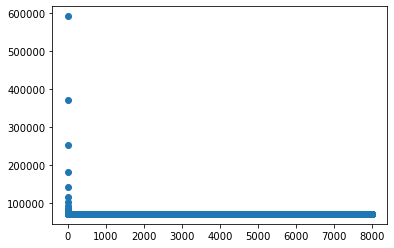

In [14]:
plt.scatter(range(len(w_list)),loss_list_1)

In [15]:
w_end = w_list[-1]
w_end

array([[-4.33184288,  3.98974033]])

# 2.1.2 一次模拟数据验证

In [16]:
y1_tr = np.dot(w_end,x_hat)
dis_1_tr = abs(y1_tr - y)#保存每个数据到线的竖直距离
m1_tr = np.mean(dis_1_tr)
xgm1_tr = np.var(dis_1_tr)

y1_te = np.dot(w_end,x_te_hat)
dis_1_te = abs(y1_te - y_te.T)#保存每个数据到线的距离
m1_te = np.mean(dis_1_te) #一次模型的均差
xgm1_te = np.var(dis_1_te)

稳定后的loss为： 72236.22267833992
训练集均差为 4.078788221060603
训练集方差为 20.998530464700004
训练集标准差为 4.582415352704293
测试集均差为 5.810524845402734
测试集方差为 22.93010181717795
测试集标准差为 4.788538588878443


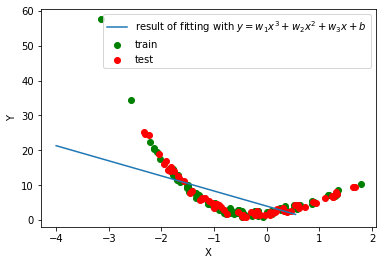

In [17]:
n=40
x2 = (np.array(np.linspace(a,b,n))).reshape(1,n) #注意x2的结构
x2_hat = np.concatenate((x2,np.ones((1,n))),axis=0)
y2 = (np.dot(w_end,x2_hat)).reshape(1,n)
plt.plot(x2.T,y2.T)

plt.scatter(train_data[:,0],train_data[:,1],c='g')
plt.scatter(test_data[:,0],test_data[:,1],c='r')
plt.legend(['result of fitting with $ y = w_1x^3 + w_2x^2 + w_3x + b $','train','test'])
plt.xlabel('X')
plt.ylabel('Y')
print('稳定后的loss为：' , float(loss_list_1[-1]))
print('训练集均差为' , m1_tr)
print('训练集方差为' , xgm1_tr)
print('训练集标准差为', np.std(dis_1_tr))
print('测试集均差为' , m1_te)
print('测试集方差为' , xgm1_te)
print('测试集标准差为' , np.std(dis_1_te))

# 2.1.3结论

本模型中对于一元拟合，在训练集上有较低的均值和较低的方差，但在测试集上差距比较大。
实际上本模型应当处于欠拟合状态，但在该区域结果不明显。

# 2.2 用三次函数拟合
$ y = w_1x^3 + w_2x^2 + w_3x + b $

In [18]:
y = y.reshape(1,train_nub)
x.shape,y.shape

((1, 102), (1, 102))

In [19]:
## 初始化w，b，形成W的增广阵
w = np.random.normal(size=3)
b = np.random.rand()
w_hat = np.concatenate((w,np.array([b])))
w_hat.reshape(1,4)

array([[ 1.40517731, -0.70714803, -0.45701551,  0.85630298]])

In [20]:
# 训练集x的增广矩阵
x_hat = np.concatenate((x**3,x**2,x,np.ones((1,train_nub))),axis=0)
x_hat = x_hat.reshape(4,train_nub)
x_te_hat = np.concatenate((x_te**3,x_te**2,x_te,np.ones((1,totnub - train_nub))),axis=0)
x_hat.shape,x_te_hat.shape
x_hat.shape,x_te_hat.shape

((4, 102), (4, 68))

In [21]:
## 超参数
lr = 1e-4

In [22]:
##主函数
w_list =[]
loss_list_3 = []
loss = 0
num = 0

while True:
    num = num +1
    loss = (1 / (2*train_nub)) * np.dot((y - np.dot(w_hat,x_hat)),(y - np.dot(w_hat,x_hat)).T)**2
    grad = - np.dot(np.dot(w_hat,x_hat)-y,x_hat.T)
    w_hat = w_hat + lr * grad
    w_list.append(w_hat)
    loss_list_3.append(loss)
    if num > 80000 or loss < 1:
        break
num

80001

In [23]:
w_end = w_list[-1]

In [24]:
loss_list_3[-1],w_end

(array([[4.75997455]]),
 array([[-1.01365684,  2.97225994,  2.05018958,  2.07428448]]))

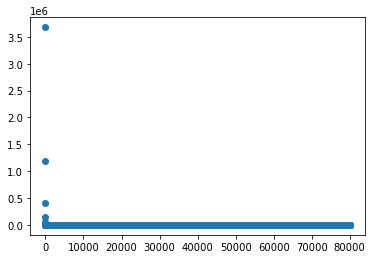

In [25]:
plt.scatter(range(num),loss_list_3)

# 2.2.2三次项模拟数据验证

In [26]:
x_hat.shape,x_te_hat.shape,y.shape,y_te.shape

((4, 102), (4, 68), (1, 102), (1, 68))

In [27]:
y2_tr = np.dot(w_end,x_hat)
dis_2_tr = abs(y2_tr - y)#保存每个数据到线的距离，带正负号
m2_tr = np.mean(dis_2_tr)
xgm2_tr = np.var(dis_2_tr)

y2_te = np.dot(w_end,x_te_hat)
dis_2_te = abs(y2_te - y_te.T)#保存每个数据到线的距离，带正负号
m2_te = np.mean(dis_2_te) #一次模型的均差
xgm2_te = np.var(dis_2_te)

the loss is 4.759974547612096
训练集均差为 0.47842766795180125
训练集方差为 0.07661119607832353
训练集标准差为 0.27678727586058494
测试集均差为 5.831599716245295
测试集方差为 34.29487642354467
测试集标准差为 5.856182751890917


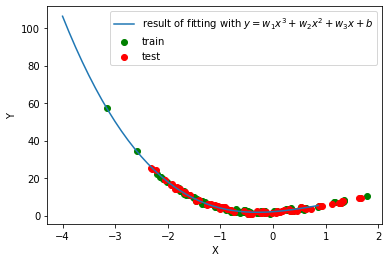

In [28]:
n=40
x2 = (np.array(np.linspace(a,b,n))).reshape(1,40) #注意x2的结构
x2_hat = np.concatenate((x2**3,x2**2,x2,np.ones((1,n))),axis=0)
y2 = (np.dot(w_end,x2_hat)).reshape(1,40)
plt.plot(x2.T,y2.T)

plt.scatter(train_data[:,0],train_data[:,1],c='g')
plt.scatter(test_data[:,0],test_data[:,1],c='r')
plt.legend(['result of fitting with $ y = w_1x^3 + w_2x^2 + w_3x + b $','train','test'])
plt.xlabel('X')
plt.ylabel('Y')
print('the loss is' , float(loss_list_3[-1]))
print('训练集均差为' , m2_tr)
print('训练集方差为' , xgm2_tr)
print('训练集标准差为' , np.std(dis_2_tr))
print('测试集均差为' , m2_te)
print('测试集方差为' , xgm2_te)
print('测试集标准差为' , np.std(dis_2_te))

# 2.2.3小结

相对一次项，三次项在整体上，测试集和训练集无论是在偏差方面还是在方差方面拟合状态都比较好。

# 2.3 用5次多项式模拟
$ y = WX ,W=(w_1,w_2,w_3,w_4,b) $

In [29]:
## 初始化w，b，形成W的增广阵
w = np.random.normal(size=5)
b = np.random.rand()
w_hat = np.concatenate((w,np.array([b])))
w_hat.reshape(1,6)

array([[-1.41423684,  0.9533122 , -0.43121105, -0.03607716, -2.02180438,
         0.50270954]])

In [30]:
# 训练集x的增广矩阵
x_hat = np.concatenate((x**5,x**4,x**3,x**2,x,np.ones((1,train_nub))),axis=0)
x_hat = x_hat.reshape(6,train_nub)
x_te_hat = np.concatenate((x_te**5,x_te**4,x_te**3,x_te**2,x_te,np.ones((1,totnub - train_nub))),axis=0)
x_hat.shape,x_te_hat.shape
x_hat.shape,x_te_hat.shape

((6, 102), (6, 68))

In [31]:
## 超参数
lr = 1e-6

In [32]:
##主函数
w_list =[]
loss_list_5 = []
loss = 0
num = 0

while True:
    num = num +1
    loss = (1 / (2*train_nub)) * np.dot((y - np.dot(w_hat,x_hat)),(y - np.dot(w_hat,x_hat)).T)**2
    grad = - np.dot(np.dot(w_hat,x_hat)-y,x_hat.T)
    w_hat = w_hat + lr * grad
    w_list.append(w_hat)
    loss_list_5.append(loss)
    if num > 80000 or loss < 1:
        break
num

80001

In [33]:
w_end = w_list[-1]
loss_list_5[-1],w_end

(array([[25.0513672]]),
 array([[ 0.09141702,  0.5770448 , -0.39321354,  1.58474246,  0.30336977,
          2.27290025]]))

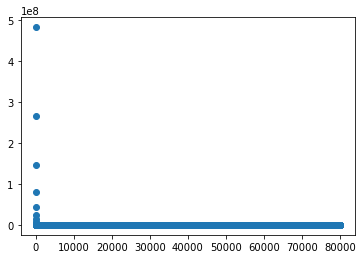

In [34]:
plt.scatter(range(num),loss_list_5)

In [35]:
y3_tr = np.dot(w_end,x_hat)
dis_3_tr = abs(y3_tr - y)#保存每个数据到线的距离，带正负号
m3_tr = np.mean(dis_3_tr)
xgm3_tr = np.var(dis_3_tr)

y3_te = np.dot(w_end,x_te_hat)
dis_3_te = abs(y3_te - y_te.T)#保存每个数据到线的距离，带正负号
m3_te = np.mean(dis_3_te) #一次模型的均差
xgm3_te = np.var(dis_3_te)

the loss is 4.759974547612096
训练集均差为 0.6602748057995962
训练集方差为 0.2648877645822944
训练集标准差为 0.5146724828299006
测试集均差为 5.700136968179381
测试集方差为 33.90175516861109
测试集标准差为 5.822521375539217


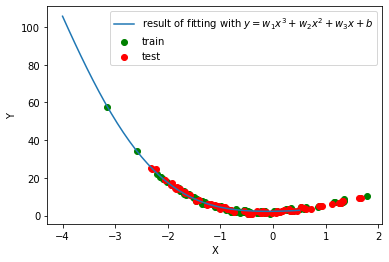

In [36]:
n=40
x2 = (np.array(np.linspace(a,b,n))).reshape(1,n) #注意x2的结构
x2_hat = np.concatenate((x2**5,x2**4,x2**3,x2**2,x2,np.ones((1,n))),axis=0)
y2 = (np.dot(w_end,x2_hat)).reshape(1,n)
plt.plot(x2.T,y2.T)

plt.scatter(train_data[:,0],train_data[:,1],c='g')
plt.scatter(test_data[:,0],test_data[:,1],c='r')
plt.legend(['result of fitting with $ y = w_1x^3 + w_2x^2 + w_3x + b $','train','test'])
plt.xlabel('X')
plt.ylabel('Y')
print('the loss is' , float(loss_list_3[-1]))
print('训练集均差为' , m3_tr)
print('训练集方差为' , xgm3_tr)
print('训练集标准差为' , np.std(dis_3_tr))
print('测试集均差为' , m3_te)
print('测试集方差为' , xgm3_te)
print('测试集标准差为' , np.std(dis_3_te))

In [37]:
w_end

array([[ 0.09141702,  0.5770448 , -0.39321354,  1.58474246,  0.30336977,
         2.27290025]])